In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

## Problem 1
Write a function which implements Euler's method. Test your function on the IVP:
$$\begin{align}
	\begin{split}
		x' (t)&= x(t) - 2t + 4,\quad 0 \leq t \leq 2, \\
		x(0) &= 0,
	\end{split}
\end{align}$$

where the analytic solution is $x(t) = -2+2t + 2e^t$.

Use the Euler method to numerically approximate the solution with step sizes $h = 0.2, 0.1$, and $0.05.$  Plot the true solution alongside the three approximations.

In [3]:
def euler(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the Euler method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    #This is here to make sure that x0 is an np.array object with length
    try:
        len(x0)
        x0 = np.array(x0)
    except TypeError:
        x0 = np.array([x0])
    
    #initialize x
    x = np.zeros((len(t),len(x0)))
    x[0,:] = x0
    
    #apply method
    for i in range(1,len(t)):
        h = t[i] - t[i-1]
        x[i] = x[i-1]+h*f(x[i-1],t[i-1])
    
    #return
    return x

<IPython.core.display.Javascript object>


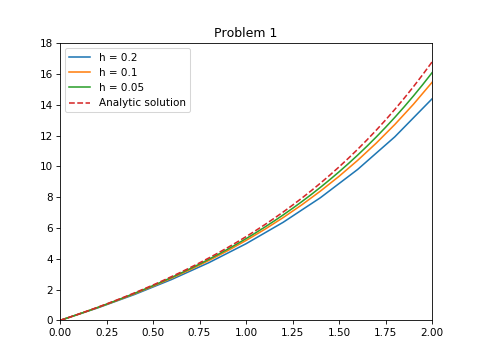

In [5]:
x0 = 0
f = lambda x,t: x - 2*t + 4

plt.figure()

for h in [.2,.1,.05]:
    t = np.arange(0,2+h,h)
    x = euler(f,x0,t)
    plt.plot(t,x,label='h = '+str(h))

plt.plot(t,-2+2*t+2*np.exp(t),'--',label='Analytic solution')
plt.xlim(0,2)
plt.ylim(0,18)
plt.title('Problem 1')
plt.legend()
plt.show()

## Problem 2

Write functions that implement the midpoint and fourth-order Runge-Kutta methods. Then, consider again the IVP from Problem 1. Use the Euler, Midpoint, and RK4 methods to approximate the value of the solution for step sizes of $h = 0.2,$ $ 0.1,$ $0.05 $, $0.025,$ and $0.0125.$ Plot the true solution alongside the approximation obtained from each method when $h=0.2$. Then, use `plt.loglog` to create a log-log plot of the relative error $|x(2)-x_n|/{|x(2)|}$ as a function of $h$ for each approximation.

In [8]:
def midpoint(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the midpoint method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    #This is here to make sure that x0 is an np.array object with length
    try:
        len(x0)
        x0 = np.array(x0)
    except TypeError:
        x0 = np.array([x0])
    
    #initialize x
    x = np.zeros((len(t),len(x0)))
    x[0,:] = x0
    
    #apply method
    for i in range(1,len(t)):
        h = t[i] - t[i-1]
        x[i] = x[i-1]+h*f(x[i-1] + h/2*f(x[i-1],t[i-1]), t[i-1]+h/2)
    
    #return
    return x

def rk4(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using a fourth-order Runge-Kutta method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    #This is here to make sure that x0 is an np.array object with length
    try:
        len(x0)
        x0 = np.array(x0)
    except TypeError:
        x0 = np.array([x0])
    
    #initialize x
    x = np.zeros((len(t),len(x0)))
    x[0,:] = x0
    
    #apply method
    for i in range(1,len(t)):
        h = t[i] - t[i-1]
        
        #define K1-K4 as shown pg 5
        K1 = f(x[i-1],t[i-1])
        K2 = f(x[i-1] + h/2*K1,t[i-1] + h/2)
        K3 = f(x[i-1] + h/2*K2,t[i-1] + h/2)
        K4 = f(x[i-1] + h*K3,t[i])
        
        x[i] = x[i-1] + h/6 * (K1 + 2*K2 + 2*K3 + K4)
    
    #return
    return x

<IPython.core.display.Javascript object>


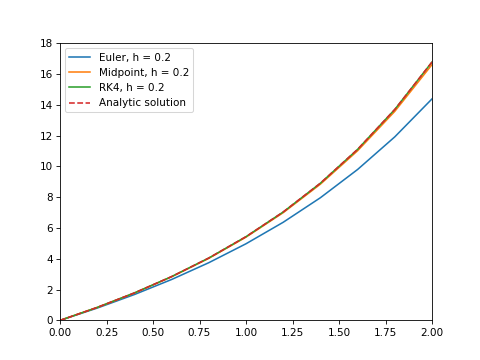

<IPython.core.display.Javascript object>


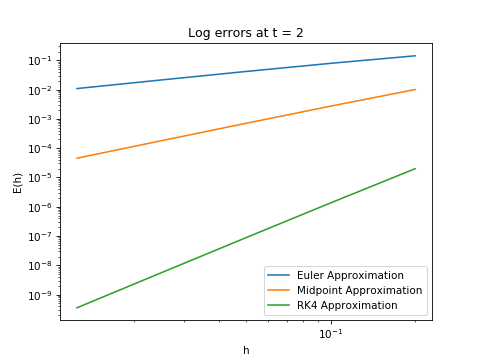

In [9]:
x0 = 0
f = lambda x,t: x - 2*t + 4
true = lambda t: -2 + 2*t + 2*np.exp(t)

x_Eul = {}
x_Mid = {}
x_rk4 = {}

# for each specified h value approximate the solution to f with the three given methods
for h in [.2, .1, .05, .025, .0125]:
    t = np.arange(0,2+h,h)
    
    x_Eul[h] = euler(f,x0,t)
    x_Mid[h] = midpoint(f,x0,t)
    x_rk4[h] = rk4(f,x0,t)

# for specified h values plot each solution and the analytic solution
for h in [0.2]:
    t = np.arange(0,2+h,h)
    
    plt.figure()
    plt.plot(t,x_Eul[h],label='Euler, h = '+str(h))
    plt.plot(t,x_Mid[h],label='Midpoint, h = '+str(h))
    plt.plot(t,x_rk4[h],label='RK4, h = '+str(h))
    plt.plot(t,true(t),'--',label='Analytic solution')
    plt.xlim(0,2)
    plt.ylim(0,18)
    plt.legend()
    plt.show()
    
    
#now create loglog error plots using error formula specified
err_Eul = []
err_Mid = []
err_rk4 = []
hs = [.2, .1, .05, .025, .0125]
for h in hs:
    err_Eul = err_Eul + [np.abs(true(2) - x_Eul[h][-1])/np.abs(true(2))]
    err_Mid = err_Mid + [np.abs(true(2) - x_Mid[h][-1])/np.abs(true(2))]
    err_rk4 = err_rk4 + [np.abs(true(2) - x_rk4[h][-1])/np.abs(true(2))]
    
plt.figure()
plt.loglog(hs,err_Eul,label="Euler Approximation")
plt.loglog(hs,err_Mid,label="Midpoint Approximation")
plt.loglog(hs,err_rk4,label="RK4 Approximation")
plt.title('Log errors at t = 2')
plt.xlabel('h')
plt.ylabel('E(h)')
plt.legend()
plt.show()

## Problem 3

Use the RK4 method to solve for the simple harmonic oscillator satisfying:
$$\begin{align}
	\begin{split}
&{}my'' + ky = 0,\quad 0 \leq t \leq 20, \\
&{}y(0) = 2, \quad
y'(0) = -1,
	\end{split}
\end{align}$$

<IPython.core.display.Javascript object>


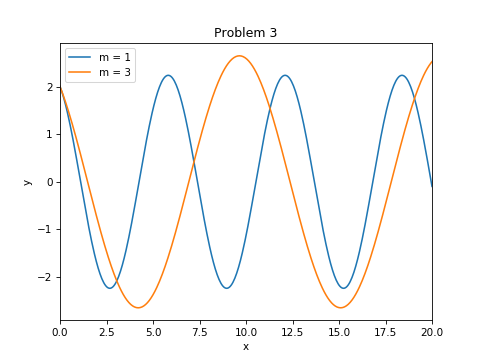

This solution makes sense physically because oscillator systems with a higher mass tend to have a lower harmonic frequency.


In [10]:
#define f for both m = 1 and m = 3
k = 1
fm_1 = lambda x, t: np.array([x[1],-k/1*x[0]])
fm_3 = lambda x, t: np.array([x[1],-k/3*x[0]])

#define y0
x0 = np.array([2, -1])

#create domain
h = .05
t = np.arange(0,20+h,h)

#calculate x values for each
x_m1 = rk4(fm_1,x0,t)
x_m3 = rk4(fm_3,x0,t)

#plot
plt.plot(t,x_m1[:,0],label='m = 1')
plt.plot(t,x_m3[:,0],label='m = 3')
plt.legend()
plt.title('Problem 3')
plt.xlim([0,20])
plt.ylabel('y')
plt.xlabel('x')
plt.show()

#answer thought provoking question
print('This solution makes sense physically because oscillator systems with a higher mass tend to have a lower harmonic frequency.')

## Problem 4

Use the RK4 method to solve for the damped free harmonic oscillator satisfying 
$$\begin{align*}
&{}y'' +\gamma y'+ y = 0, \quad 0 \leq t \leq 20,\\
&{}y(0) = 1, \quad
y'(0) = -1.
\end{align*}$$
For $\gamma = 1/2,$ and $\gamma = 1$, simultaneously plot your numerical approximations of $y$.

<IPython.core.display.Javascript object>


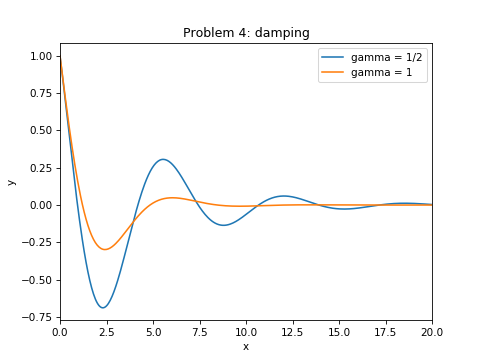

In [14]:
#define f for both m = 1 and m = 3
k = 1
m = 1
gamma1 = 1/2
gamma2 = 1
f_gamma1 = lambda x, t: np.array([x[1],(-k*x[0]-gamma1*x[1])/m])
f_gamma2 = lambda x, t: np.array([x[1],(-k*x[0]-gamma2*x[1])/m])

#define y0
y0 = 1
yp0 = -1
x0 = np.array([y0, yp0])

#create domain
h = .05
t = np.arange(0,20+h,h)

#calculate x values for each
x_gamma1 = rk4(f_gamma1,x0,t)
x_gamma2 = rk4(f_gamma2,x0,t)

#plot
plt.plot(t,x_gamma1[:,0],label='gamma = 1/2')
plt.plot(t,x_gamma2[:,0],label='gamma = 1')
plt.legend()
plt.title('Problem 4: damping')
plt.xlim([0,20])
plt.ylabel('y')
plt.xlabel('x')
plt.show()

## Problem 5

Use the RK4 method to solve for the damped and forced harmonic oscillator satisfying 
\begin{align}
	\begin{split}
&{}2y'' + \gamma y' + 2y = 2 \cos (\omega t), \quad 0 \leq t \leq 40,\\
&{}y(0) = 2, \quad
y'(0) = -1. 
	\end{split}
	\label{ivp:damped_forced_oscillator}
\end{align}
For the following values of $\gamma$ and $\omega,$ plot your numerical approximations of $y(t)$: $(\gamma, \omega) = (0.5, 1.5),$ $(0.1, 1.1),$ and $(0, 1)$.

<IPython.core.display.Javascript object>


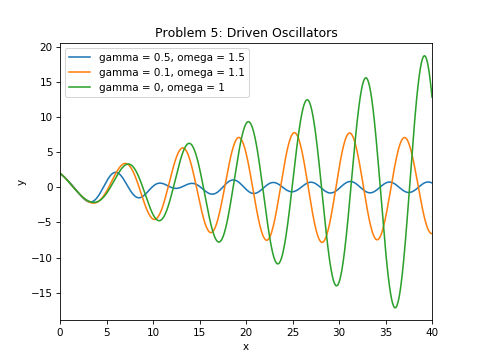

In [21]:
#initial parameters and f
k = 2
m = 2

#define y0, calling y0 x0 because of earlier mistake and a lack of energy :)
y0 = 2
yp0 = -1
x0 = np.array([y0, yp0])

#create domain
h = .05
tn = np.arange(0,40+h,h)

plt.figure()

params = [(.5,1.5),(.1,1.1),(0,1)]
for gamma,omega in params:
    f = lambda x, t: np.array([x[1],(2*np.cos(omega*t)-k*x[0]-gamma*x[1])/m])
    
    #calculate x values for each set (gamma, omega)
    y =  rk4(f,x0,tn)
    
    #plot each
    plt.plot(t,y[:,0],label='gamma = '+str(gamma) + ', omega = ' + str(omega))

#rest of plot settings
plt.legend()
plt.title('Problem 5: Driven Oscillators')
plt.xlim([0,40])
plt.ylabel('y')
plt.xlabel('x')
plt.show()